In [184]:
%store -r import_all_libs

In [185]:
import_all_libs

* **faturamento_lojas_atuais.csv**: Faturamento mensal das lojas, contendo informações dos anos de 2016 e 2017
* **lojas_atuais.csv**: Não iremos disponibilizar uma descrição das variáveis presentes neste arquivo. Elas representam as características das lojas, como a metragem, número de cadeiras, número de funcionários, etc. Este arquivo também contém as informações da localização da loja. As colunas de localização serão o código do município e código da área de ponderação. Estes códigos são os mesmos utilizados pelo IBGE.
* **cenarios_exapansao.csv**: Dados cadastrais de lojas para serem utilizadas no desafio 2. Este arquivo contém as mesmas informações contidas no arquivo lojas_atuais.csv

**A métrica de avaliação será o RMSE (Root Mean Square Error) entre o valor enviado e o real**

* **desafio_1.csv**
    - Formato: Arquivo texto com separador ‘;’
    - Este arquivo deverá conter a previsão da média de faturamento dos três primeiros meses de 2018, referente as lojas presentes no arquivo lojas_atuais.csv
    - Colunas requeridas:
        - cod_loja
        - faturamento
        
* **desafio_2.csv**
    - Formato: Arquivo texto com separador ‘;’
    - Este arquivo deverá conter a previsão da média de faturamento dos três primeiros meses de 2018, referente as lojas presentes no arquivo cenarios_exapansao.csv
    - Colunas requeridas:
        - cod_loja
        - faturamento

In [ ]:
fat_ljs_atual = pd.read_csv('/home/tuts/datasets/uspvsufmg/faturamento_lojas_atuais.csv')
cen_exp = pd.read_csv('/home/tuts/datasets/uspvsufmg/cenarios_expansao.csv')
ljs_atual = pd.read_csv('/home/tuts/datasets/uspvsufmg/lojas_atuais.csv')

___

## Faturamento

- Qual categoria rende mais?
- Qual loja teve a maior receita em todo o período?


- Qual a distribuição das quantidades de venda por categoria? (Verificar considerando as quantidades, qual categoria foi mais lucrativa) -> auxilia na questão de ver se a categoria 11 é realmente predominante
- Qual a contribuição das unidades vendidas na receita? (Valor unitário médio de cada categoria).
- Qual o faturamento por região? (Município, dependendo da distribuição das lojas no país).
- Qual a relação da receita por categoria em cada loja?


- A categoria 11 é predominante em todas as lojas? Ou em apenas na maioria delas?

In [4]:
fat_ljs_atual.head()

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30


In [14]:
fat_ljs_atual.cod_loja.nunique()

3130

In [7]:
fat_ljs_atual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003094 entries, 0 to 1003093
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cod_loja   1003094 non-null  int64  
 1   ano        1003094 non-null  int64  
 2   mes        1003094 non-null  int64  
 3   categoria  1003094 non-null  object 
 4   qtde       1003094 non-null  float64
 5   receita    1003094 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.9+ MB


In [15]:
fat_ljs_atual.categoria.nunique()

16

In [17]:
fat_ljs_atual.categoria.value_counts()

CATEG_07    73641
CATEG_09    73639
CATEG_11    73639
CATEG_05    73638
CATEG_12    73637
CATEG_03    73637
CATEG_10    73591
CATEG_08    73451
CATEG_04    73344
CATEG_01    73330
CATEG_06    72977
CATEG_13    70967
CATEG_14    69931
CATEG_02    52734
CATEG_15      936
CATEG_16        2
Name: categoria, dtype: int64

### Receita por loja e categoria

In [149]:
gb_codlj_cat_receita = fat_ljs_atual[['cod_loja', 'categoria', 'receita']].groupby(['cod_loja', 'categoria'], as_index=False).sum()
gb_codlj_cat_receita.head()

,cod_loja,categoria,receita
0,1,CATEG_01,135828.65
1,1,CATEG_02,47374.26
2,1,CATEG_03,1109475.45
3,1,CATEG_04,240339.69
4,1,CATEG_05,1609385.58


In [159]:
loja_das_lojas = gb_codlj_cat_receita.iloc[gb_codlj_cat_receita.receita.argmax()]

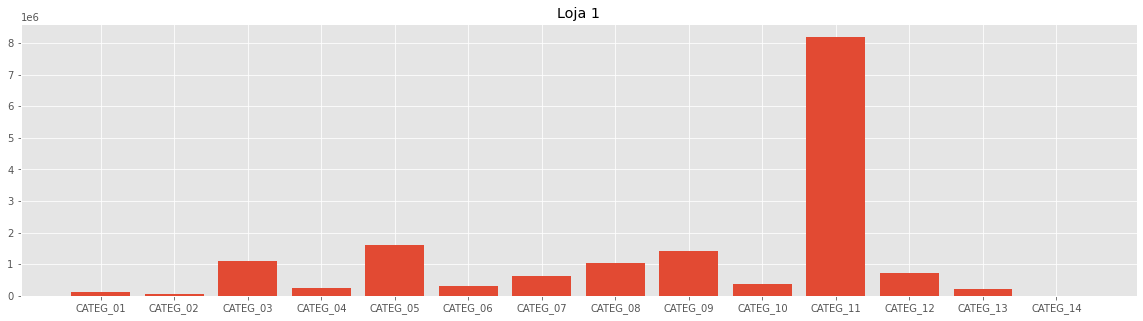

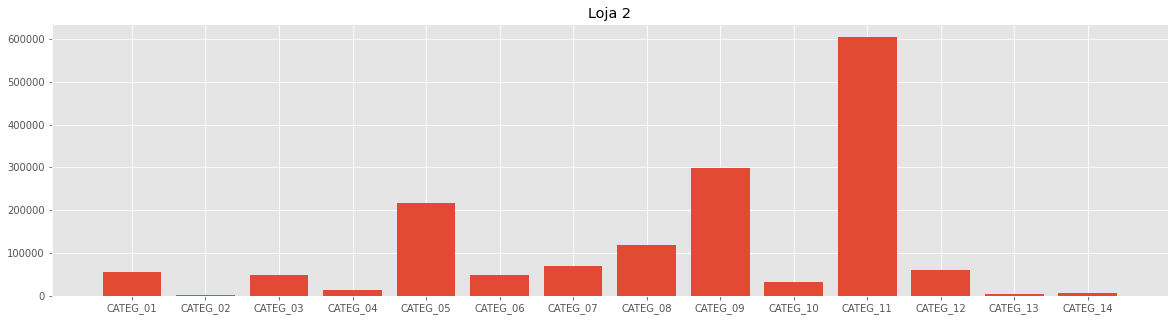

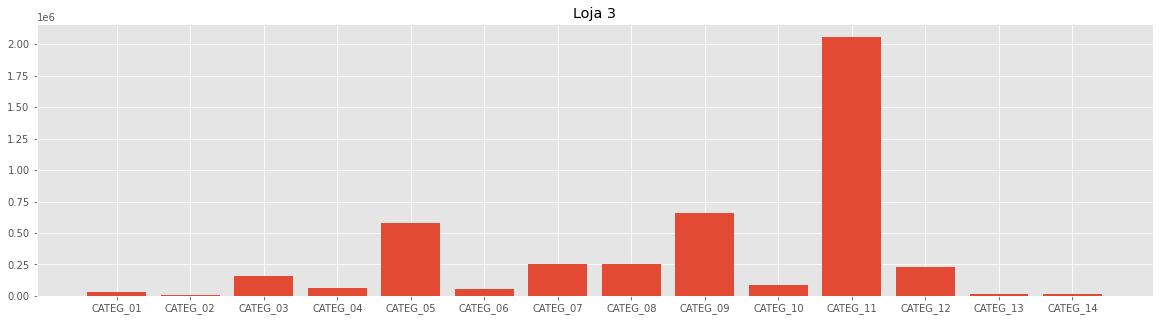

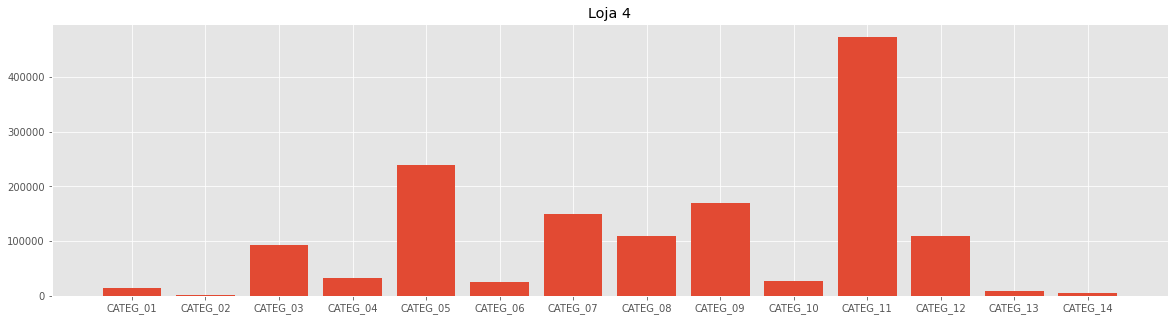

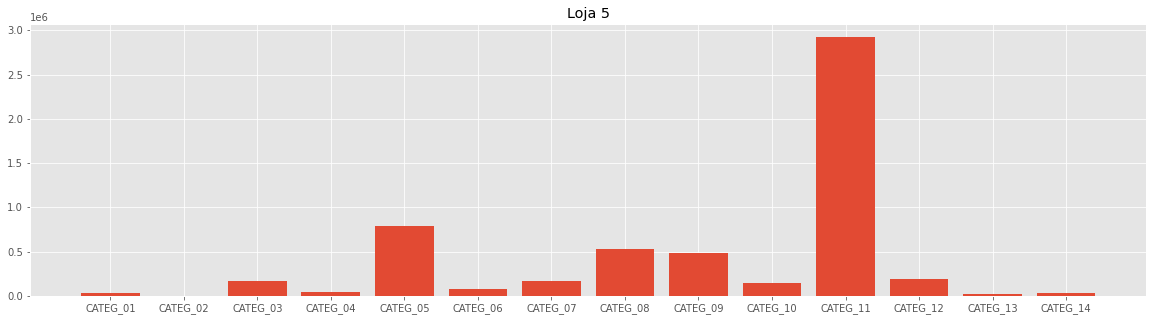

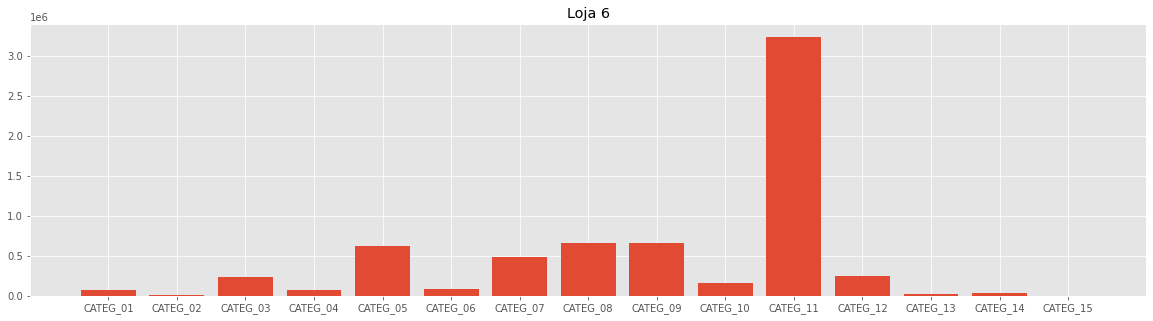

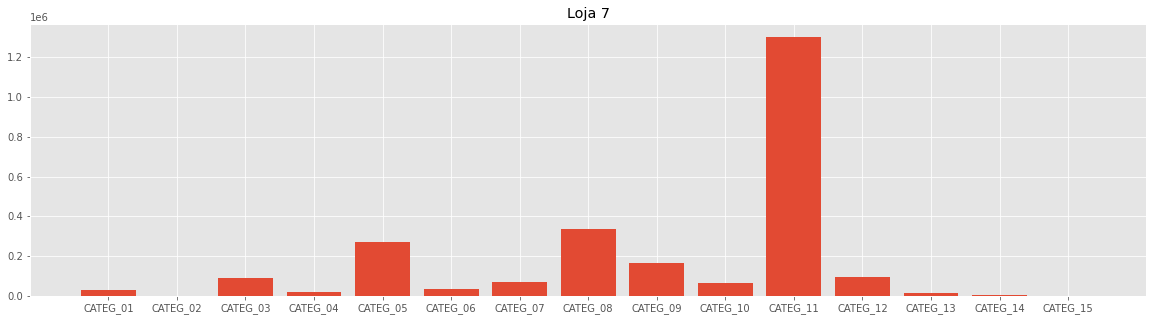

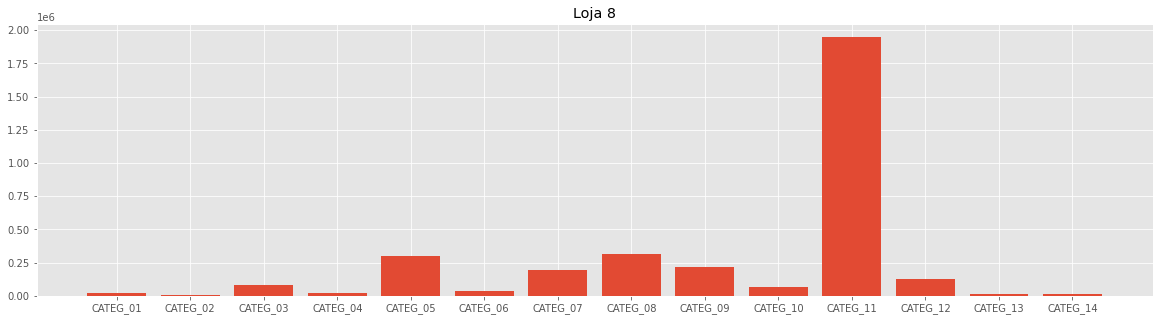

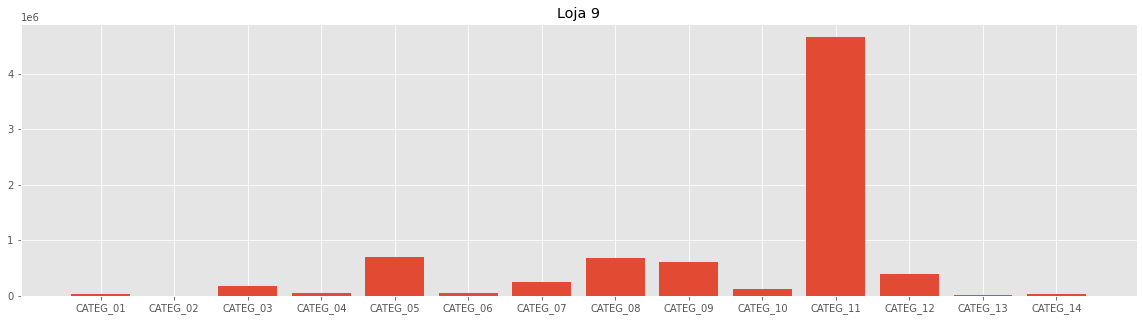

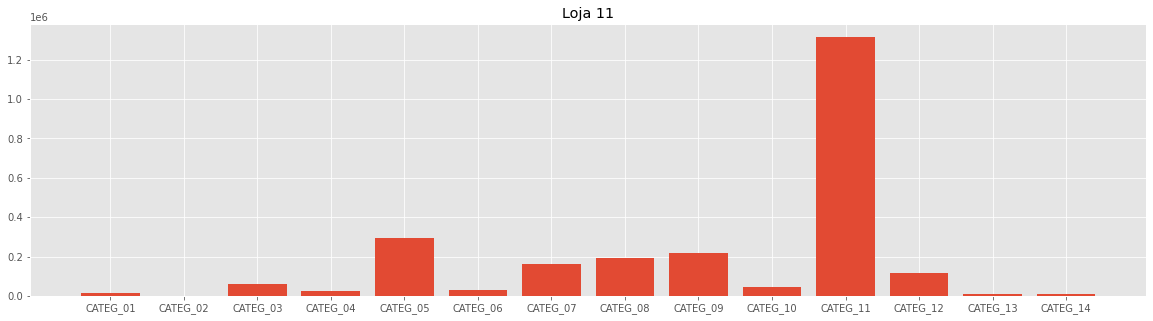

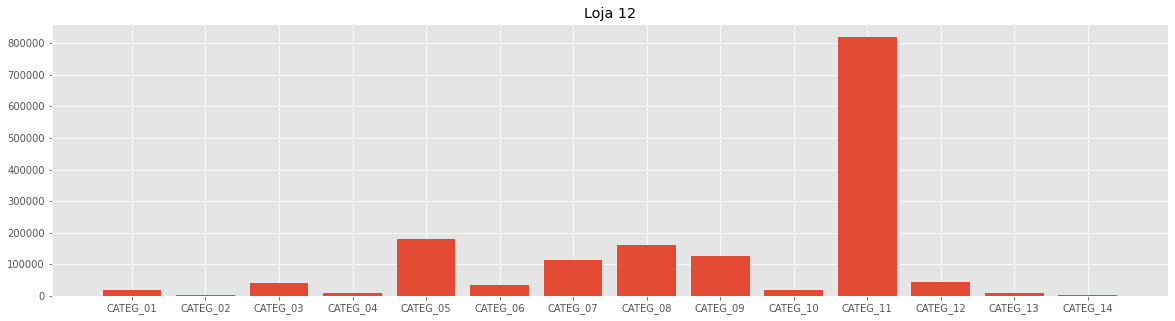

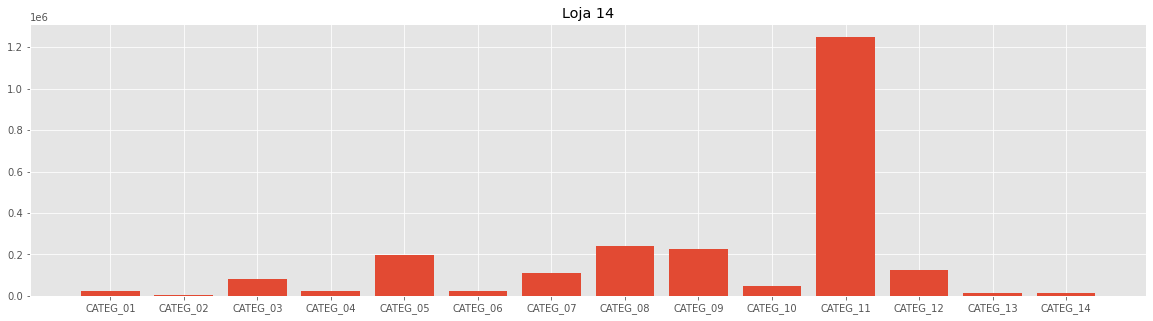

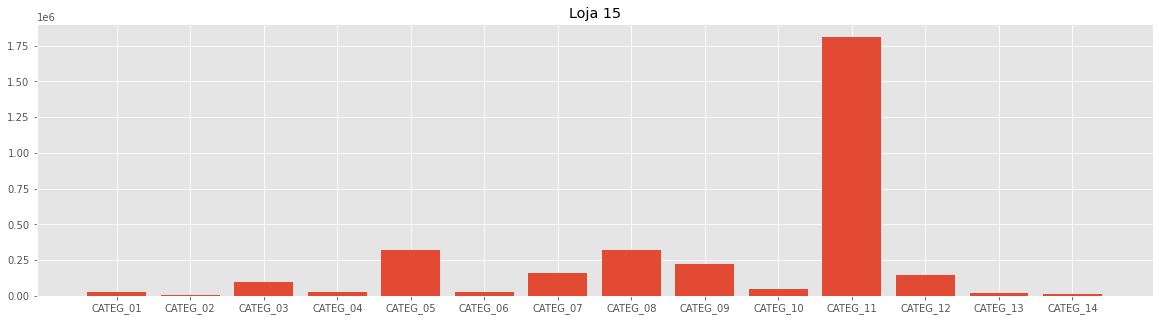

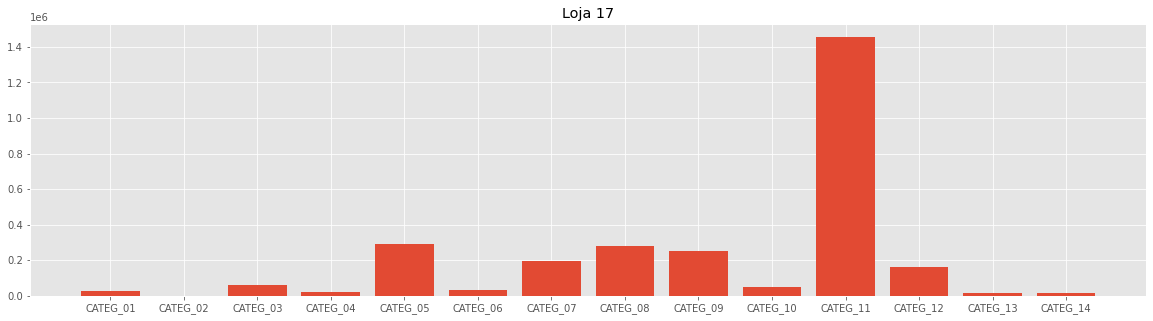

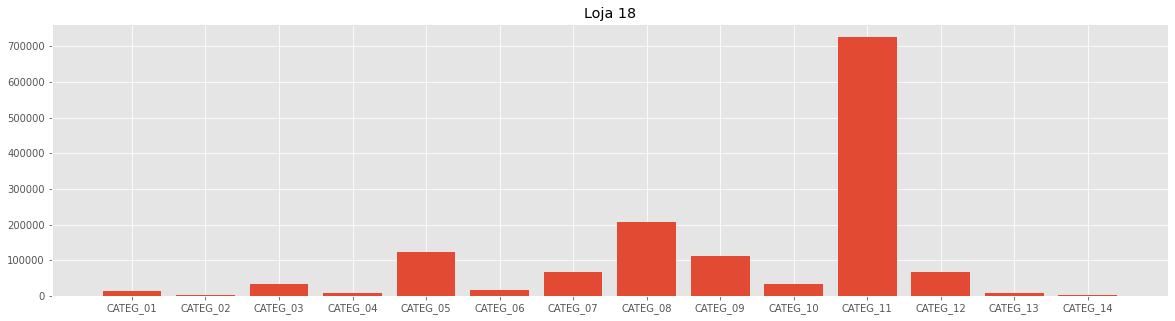

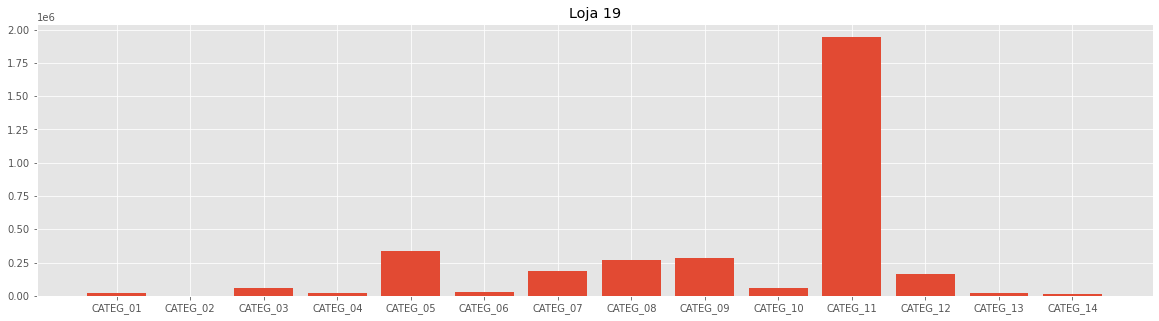

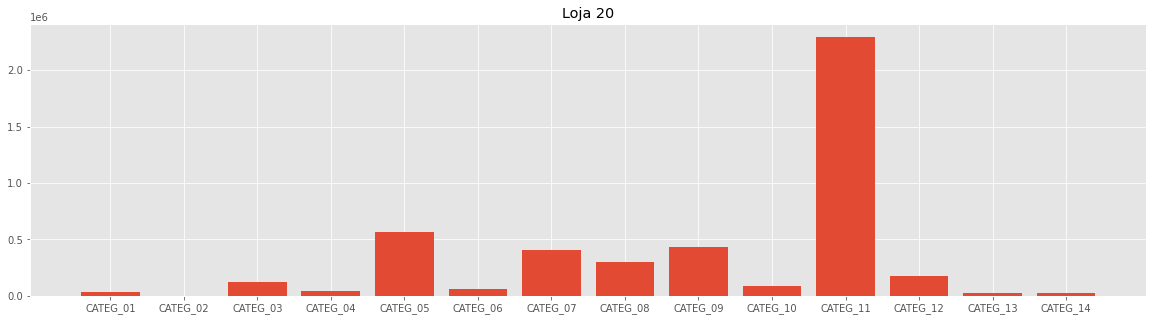

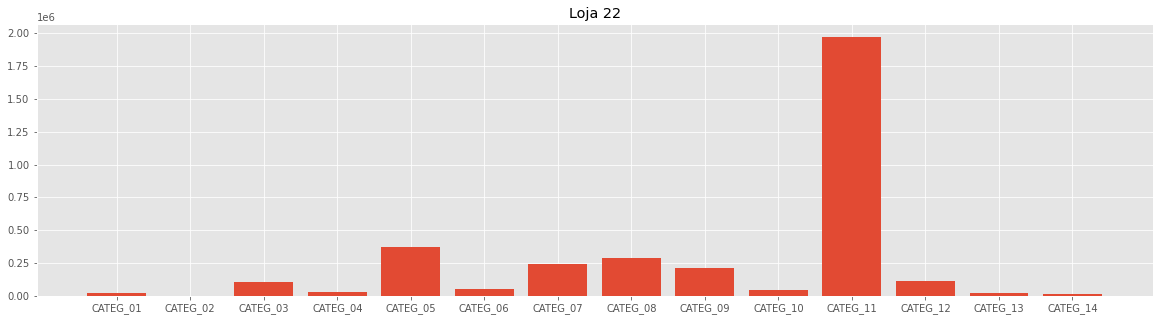

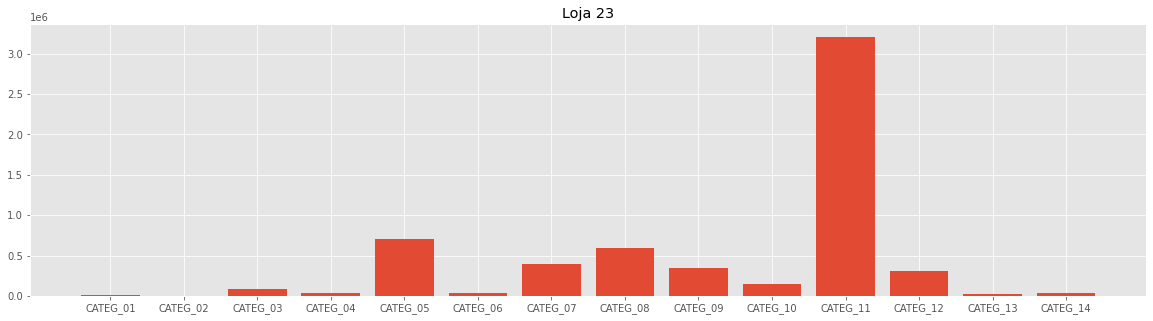

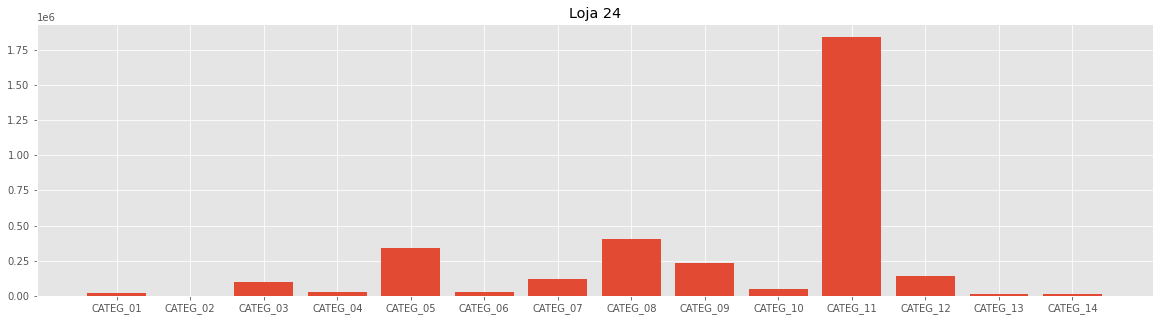

In [154]:
lojas = gb_codlj_cat_receita.cod_loja.unique()
for loja in lojas[0:20]:
    lj = gb_codlj_cat_receita[gb_codlj_cat_receita.cod_loja == loja]
    plt.figure(figsize=(20,5))
    plt.bar(x=lj.categoria, height=lj.receita);
    plt.title(f'Loja {str(loja)}', fontdict={'color':'black'})
    plt.show()

### A categoria 11 vende mais em todas as lojas? Sim

In [174]:
categorias = dict()

In [175]:
for loja in lojas:
    lj = gb_codlj_cat_receita[gb_codlj_cat_receita.cod_loja == loja]
    idx = lj.receita.argmax()
    row = lj.iloc[idx]
    val = categorias.get(row.categoria, 0)
    categorias[row.categoria] = val + 1

In [176]:
categorias

{'CATEG_11': 3130}

In [172]:
len(lojas)

3130

### Em qual loja tivemos o maior lucro considerando as categorias?

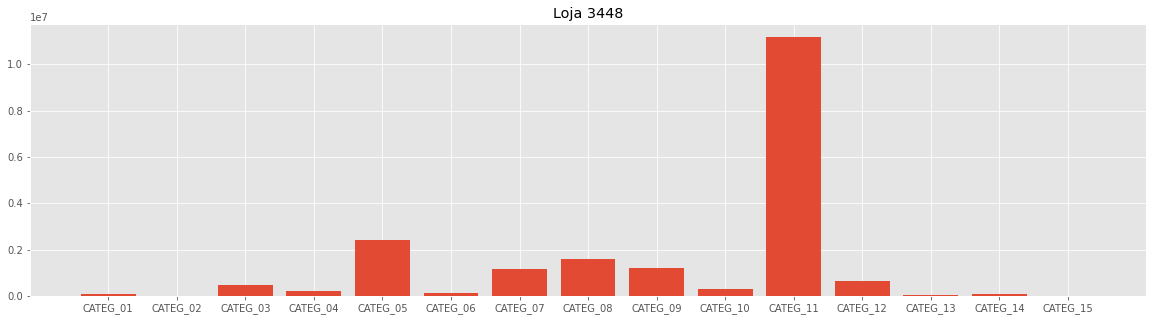

In [163]:
lj = gb_codlj_cat_receita[gb_codlj_cat_receita.cod_loja == loja_das_lojas.cod_loja]
plt.figure(figsize=(20,5))
plt.bar(x=lj.categoria, height=lj.receita);
plt.title(f'Loja {str(loja_das_lojas.cod_loja)}', fontdict={'color':'black'});

### Receita por loja

In [18]:
gb_lj_receita = fat_ljs_atual[['cod_loja', 'receita']].groupby('cod_loja', as_index=False).sum()
gb_lj_receita.head()

,cod_loja,receita
0,1,15990575.05
1,2,1582989.01
2,3,4467056.13
3,4,1460848.26
4,5,5612752.46


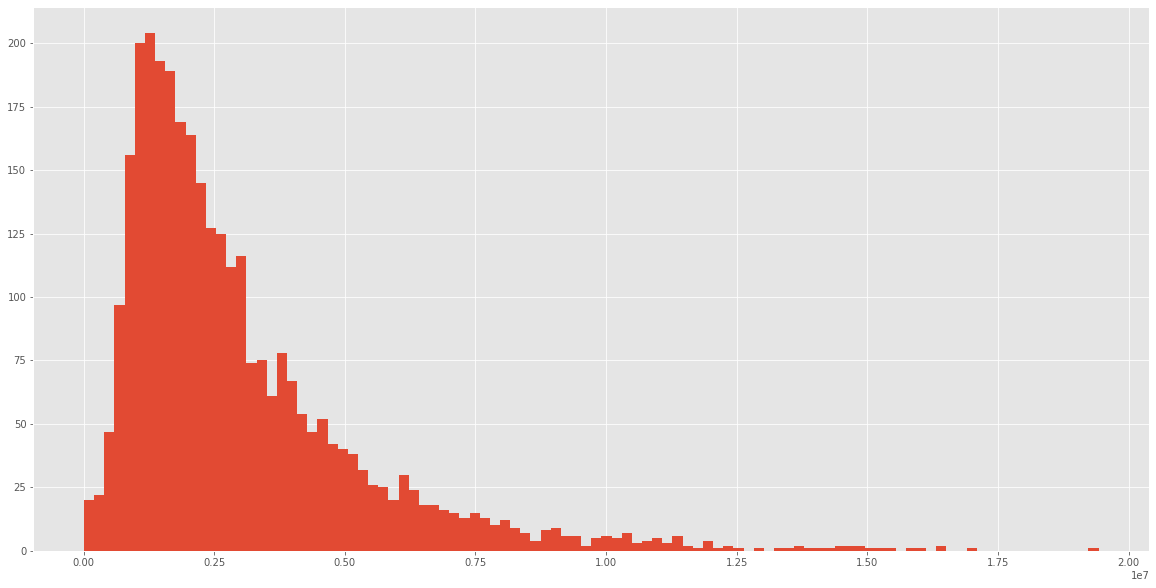

In [30]:
plt.figure(figsize=(20,10))
plt.hist(gb_lj_receita.receita, bins=100);

In [31]:
gb_lj_receita.receita.describe()

count       3130.00
mean     2991481.66
std      2365832.50
min         9202.70
25%      1403307.18
50%      2281479.89
75%      3824464.47
max     19426790.13
Name: receita, dtype: float64

In [46]:
gb_cat_receita = fat_ljs_atual[['categoria', 'receita']].groupby('categoria', as_index=False).agg(['sum', 'count'], axis=1)
gb_cat_receita.reset_index(inplace=True)
gb_cat_receita.head()

categoria       receita       
                      sum  count
0  CATEG_01   69459537.75  73330
1  CATEG_02    7507082.78  52734
2  CATEG_03  335854146.21  73637
3  CATEG_04  116636953.57  73344
4  CATEG_05 1189124313.64  73638

In [49]:
gb_cat_receita

categoria       receita       
                       sum  count
0   CATEG_01   69459537.75  73330
1   CATEG_02    7507082.78  52734
2   CATEG_03  335854146.21  73637
3   CATEG_04  116636953.57  73344
4   CATEG_05 1189124313.64  73638
5   CATEG_06  104199931.45  72977
6   CATEG_07  569669595.37  73641
7   CATEG_08  722160378.98  73451
8   CATEG_09  941137765.89  73639
9   CATEG_10  178655007.82  73591
10  CATEG_11 4610573177.40  73639
11  CATEG_12  445713418.95  73637
12  CATEG_13   35811032.09  70967
13  CATEG_14   36804060.18  69931
14  CATEG_15      30879.54    936
15  CATEG_16        299.90      2

### Receita por categoria

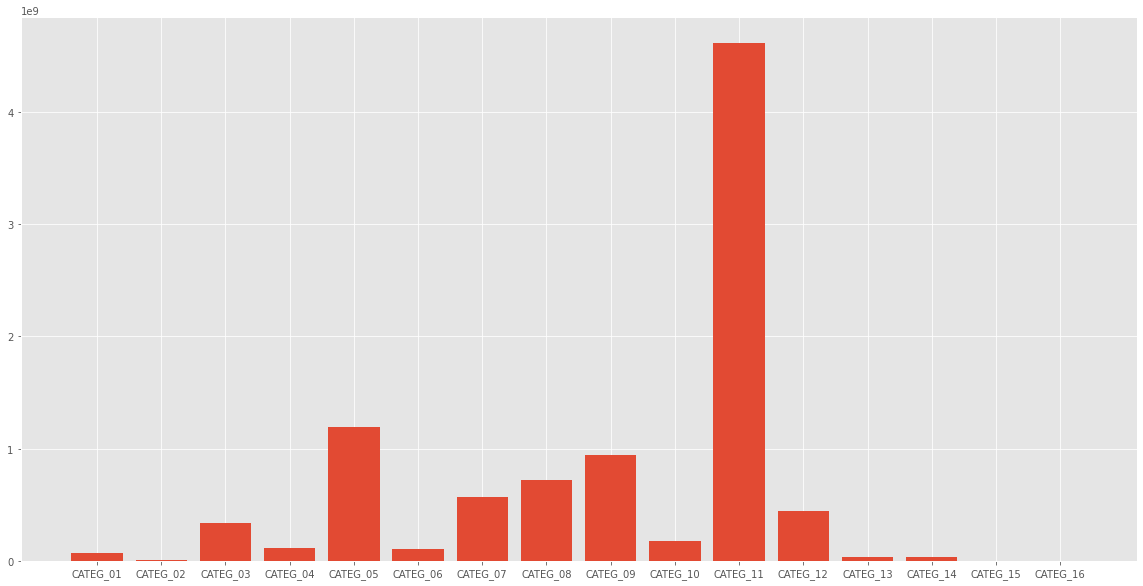

In [53]:
plt.figure(figsize=(20,10))
plt.bar(x=gb_cat_receita.categoria, height=gb_cat_receita['receita']['sum']);

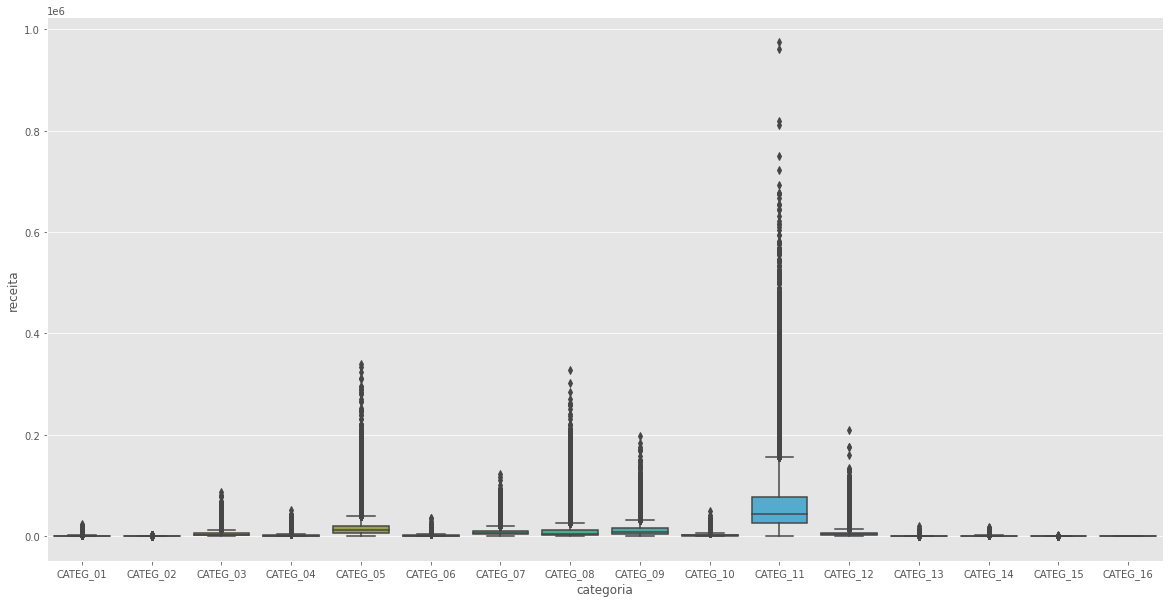

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x=fat_ljs_atual.categoria, y=fat_ljs_atual.receita);

In [56]:
gb_cat_receita['prop'] = gb_cat_receita['receita']['sum'] / gb_cat_receita['receita']['count']
gb_cat_receita.head()

categoria       receita            prop
                      sum  count         
0  CATEG_01   69459537.75  73330   947.22
1  CATEG_02    7507082.78  52734   142.36
2  CATEG_03  335854146.21  73637  4560.94
3  CATEG_04  116636953.57  73344  1590.27
4  CATEG_05 1189124313.64  73638 16148.24

### Receita por unidade de cada categoria

#### (corrigir por quantidades)

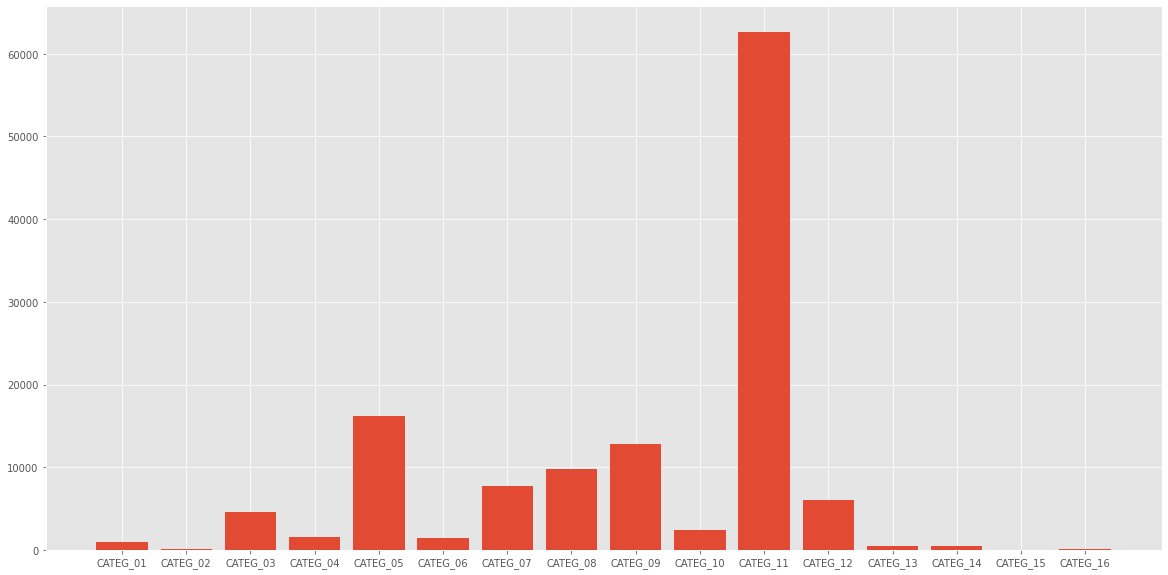

In [57]:
plt.figure(figsize=(20,10))
plt.bar(x=gb_cat_receita.categoria, height=gb_cat_receita['prop']);

In [65]:
fat_ljs_atual['datetime'] = pd.to_datetime(fat_ljs_atual.ano*100+fat_ljs_atual.mes,format='%Y%m')
fat_ljs_atual.head()

,cod_loja,ano,mes,categoria,qtde,receita,datetime
0,1,2016,1,CATEG_01,301.00,9164.86,2016-01-01
1,1,2016,2,CATEG_01,187.00,8175.55,2016-02-01
2,1,2016,3,CATEG_01,242.00,10521.67,2016-03-01
3,1,2016,4,CATEG_01,104.00,4560.91,2016-04-01
4,1,2016,5,CATEG_01,100.00,4263.30,2016-05-01


### Receita por ano/mês

In [67]:
gb_date_receita = fat_ljs_atual[['datetime', 'receita']].groupby(['datetime'], as_index=False).sum()
gb_date_receita.head()

,datetime,receita
0,2016-01-01,364784885.18
1,2016-02-01,258856554.22
2,2016-03-01,308149053.94
3,2016-04-01,316512361.32
4,2016-05-01,455139463.61


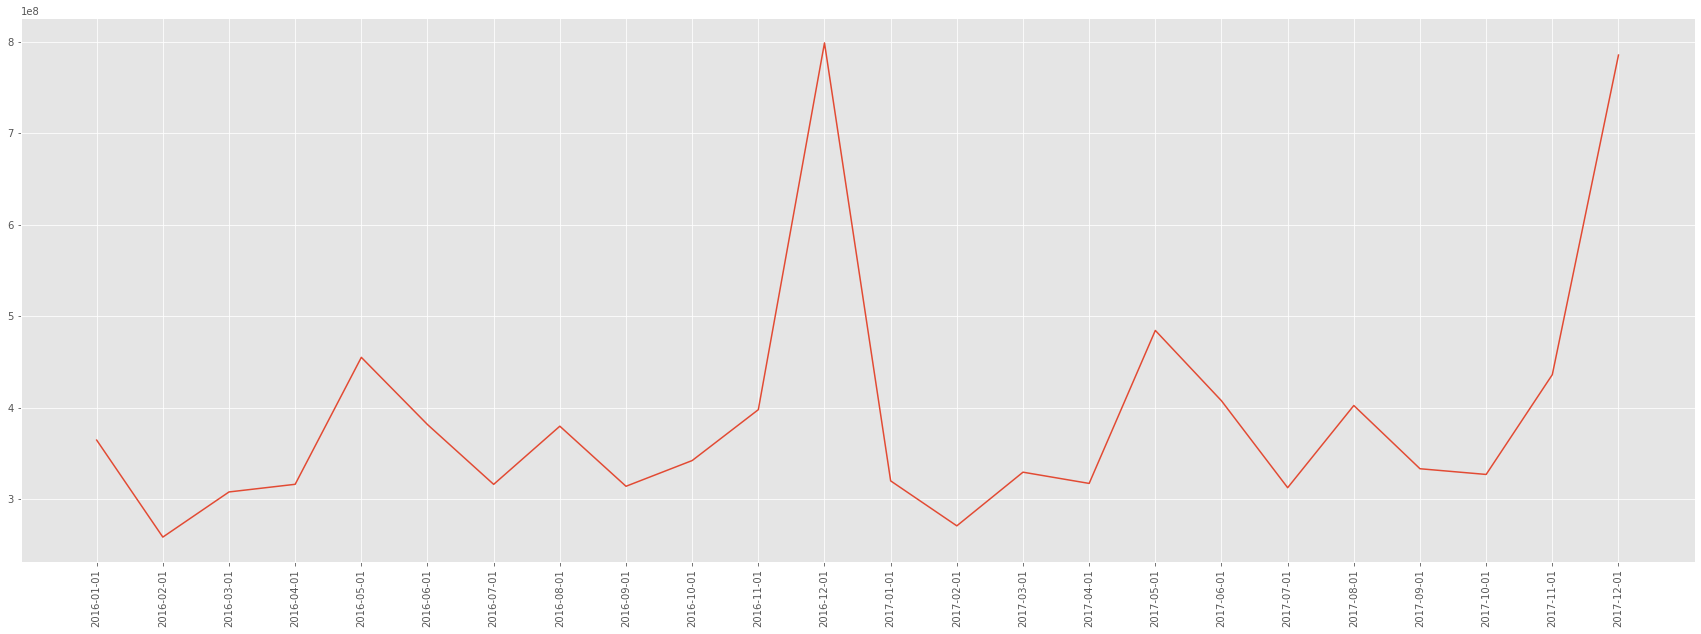

In [89]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.plot(gb_date_receita.datetime.apply(lambda x: x.strftime('%Y-%m-%d')), gb_date_receita.receita);

In [90]:
gb_date_cat_receita = fat_ljs_atual[['datetime', 'categoria', 'receita']].groupby(['datetime', 'categoria'], as_index=False).sum()
gb_date_cat_receita.head()

,datetime,categoria,receita
0,2016-01-01,CATEG_01,2626267.29
1,2016-01-01,CATEG_02,514115.70
2,2016-01-01,CATEG_03,10449226.38
3,2016-01-01,CATEG_04,3876484.36
4,2016-01-01,CATEG_05,35075801.44


### Receita ano/mês sem categoria 11

In [146]:
gb_without_11 = gb_date_cat_receita[gb_date_cat_receita.categoria != 'CATEG_11']
gb_without_11.head()

,datetime,categoria,receita
0,2016-01-01,CATEG_01,2626267.29
1,2016-01-01,CATEG_02,514115.70
2,2016-01-01,CATEG_03,10449226.38
3,2016-01-01,CATEG_04,3876484.36
4,2016-01-01,CATEG_05,35075801.44


In [147]:
gb_without_11 = gb_without_11[['datetime', 'receita']].groupby('datetime', as_index=False).sum()
gb_without_11.head()

,datetime,receita
0,2016-01-01,153199631.97
1,2016-02-01,141010988.15
2,2016-03-01,148348291.22
3,2016-04-01,161295768.59
4,2016-05-01,218812270.74


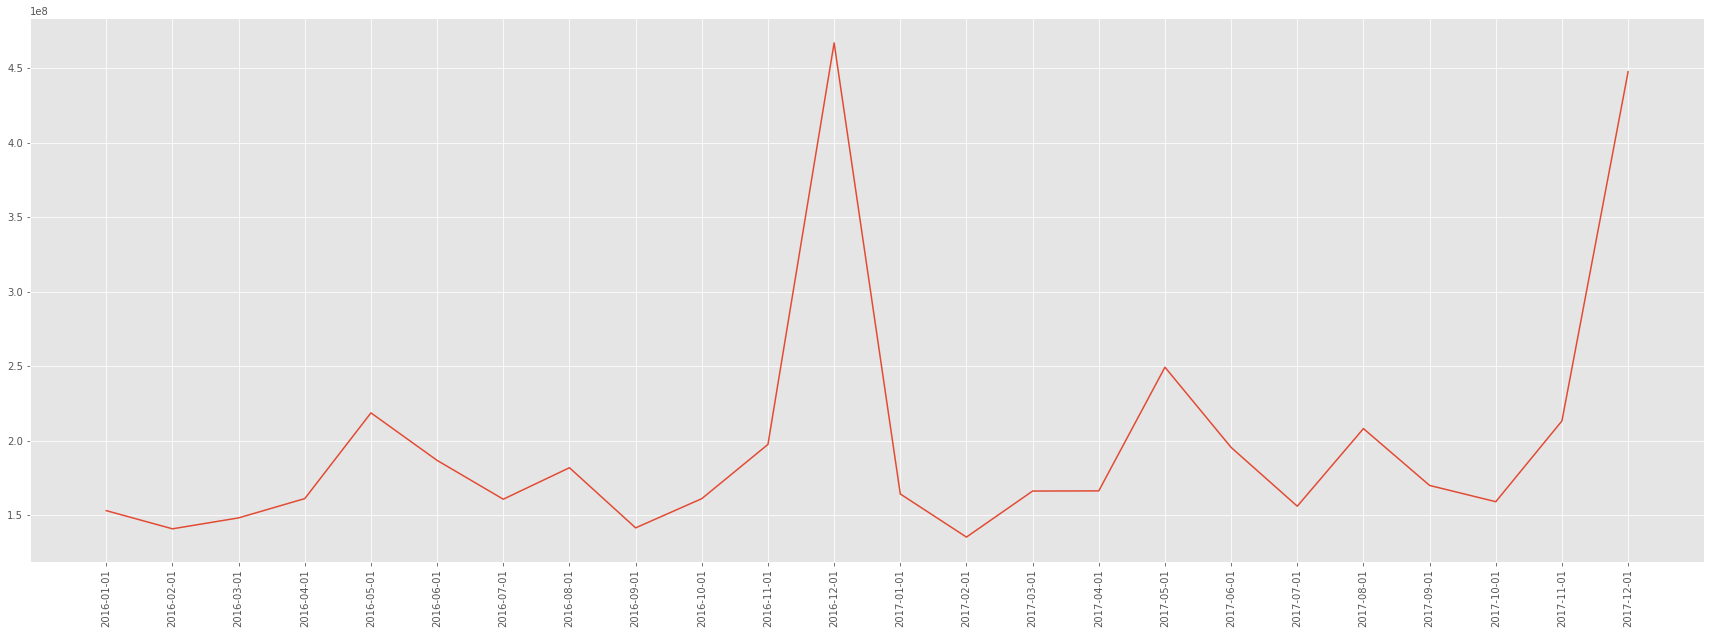

In [148]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.plot(gb_without_11.datetime.apply(lambda x: x.strftime('%Y-%m-%d')), gb_without_11.receita);

In [97]:
gb = gb_date_cat_receita.groupby('categoria', as_index=False)
gb.head()

,datetime,categoria,receita
0,2016-01-01,CATEG_01,2626267.29
1,2016-01-01,CATEG_02,514115.70
2,2016-01-01,CATEG_03,10449226.38
3,2016-01-01,CATEG_04,3876484.36
4,2016-01-01,CATEG_05,35075801.44
...,...,...,...
72,2016-05-01,CATEG_13,871591.65
73,2016-05-01,CATEG_14,857869.05
74,2016-05-01,CATEG_15,1676.63
75,2016-05-01,CATEG_16,269.91


### Receita por categoria, considerando ano/mês

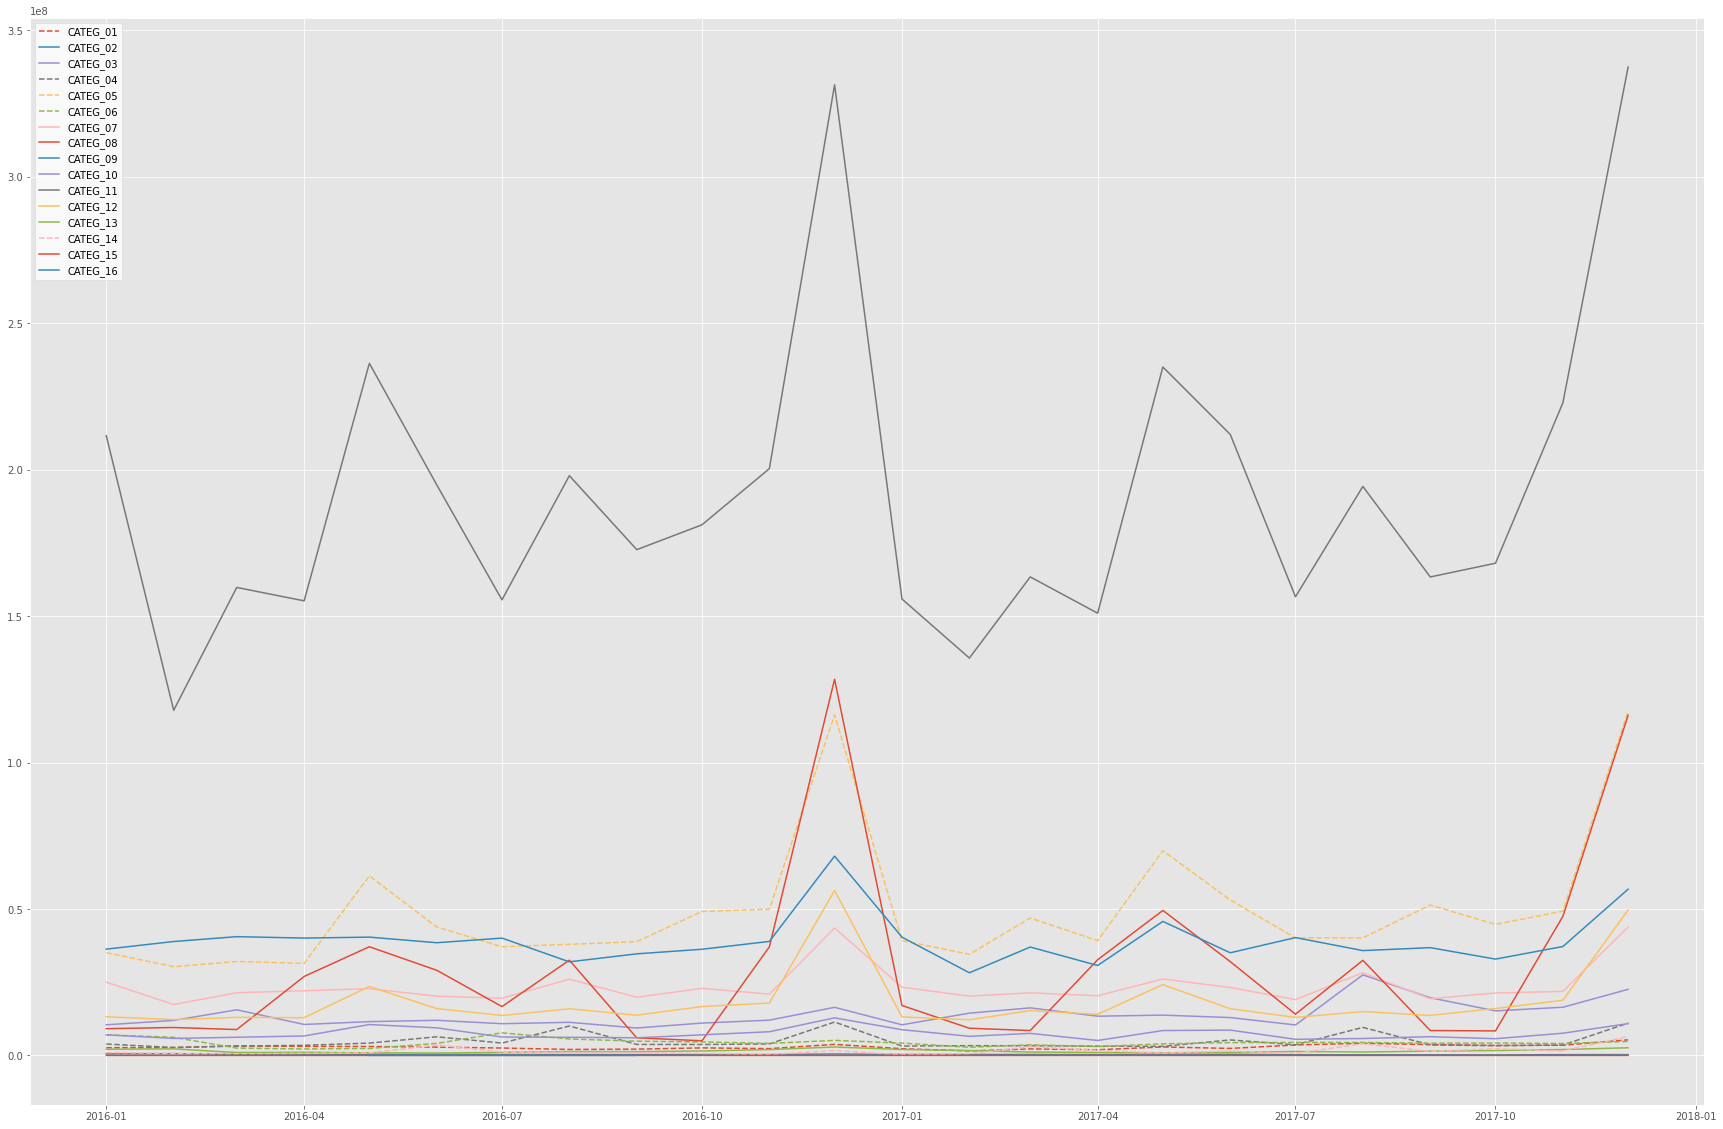

In [120]:
plt.figure(figsize=(30,20))
for i, df in gb:
    if np.random.random() > 0.5:
        line = np.random.choice(['-', '--'])
    plt.plot(df.datetime, df.receita, label=i, linestyle=line)
plt.legend(labelcolor='black', facecolor="white", loc='upper left');

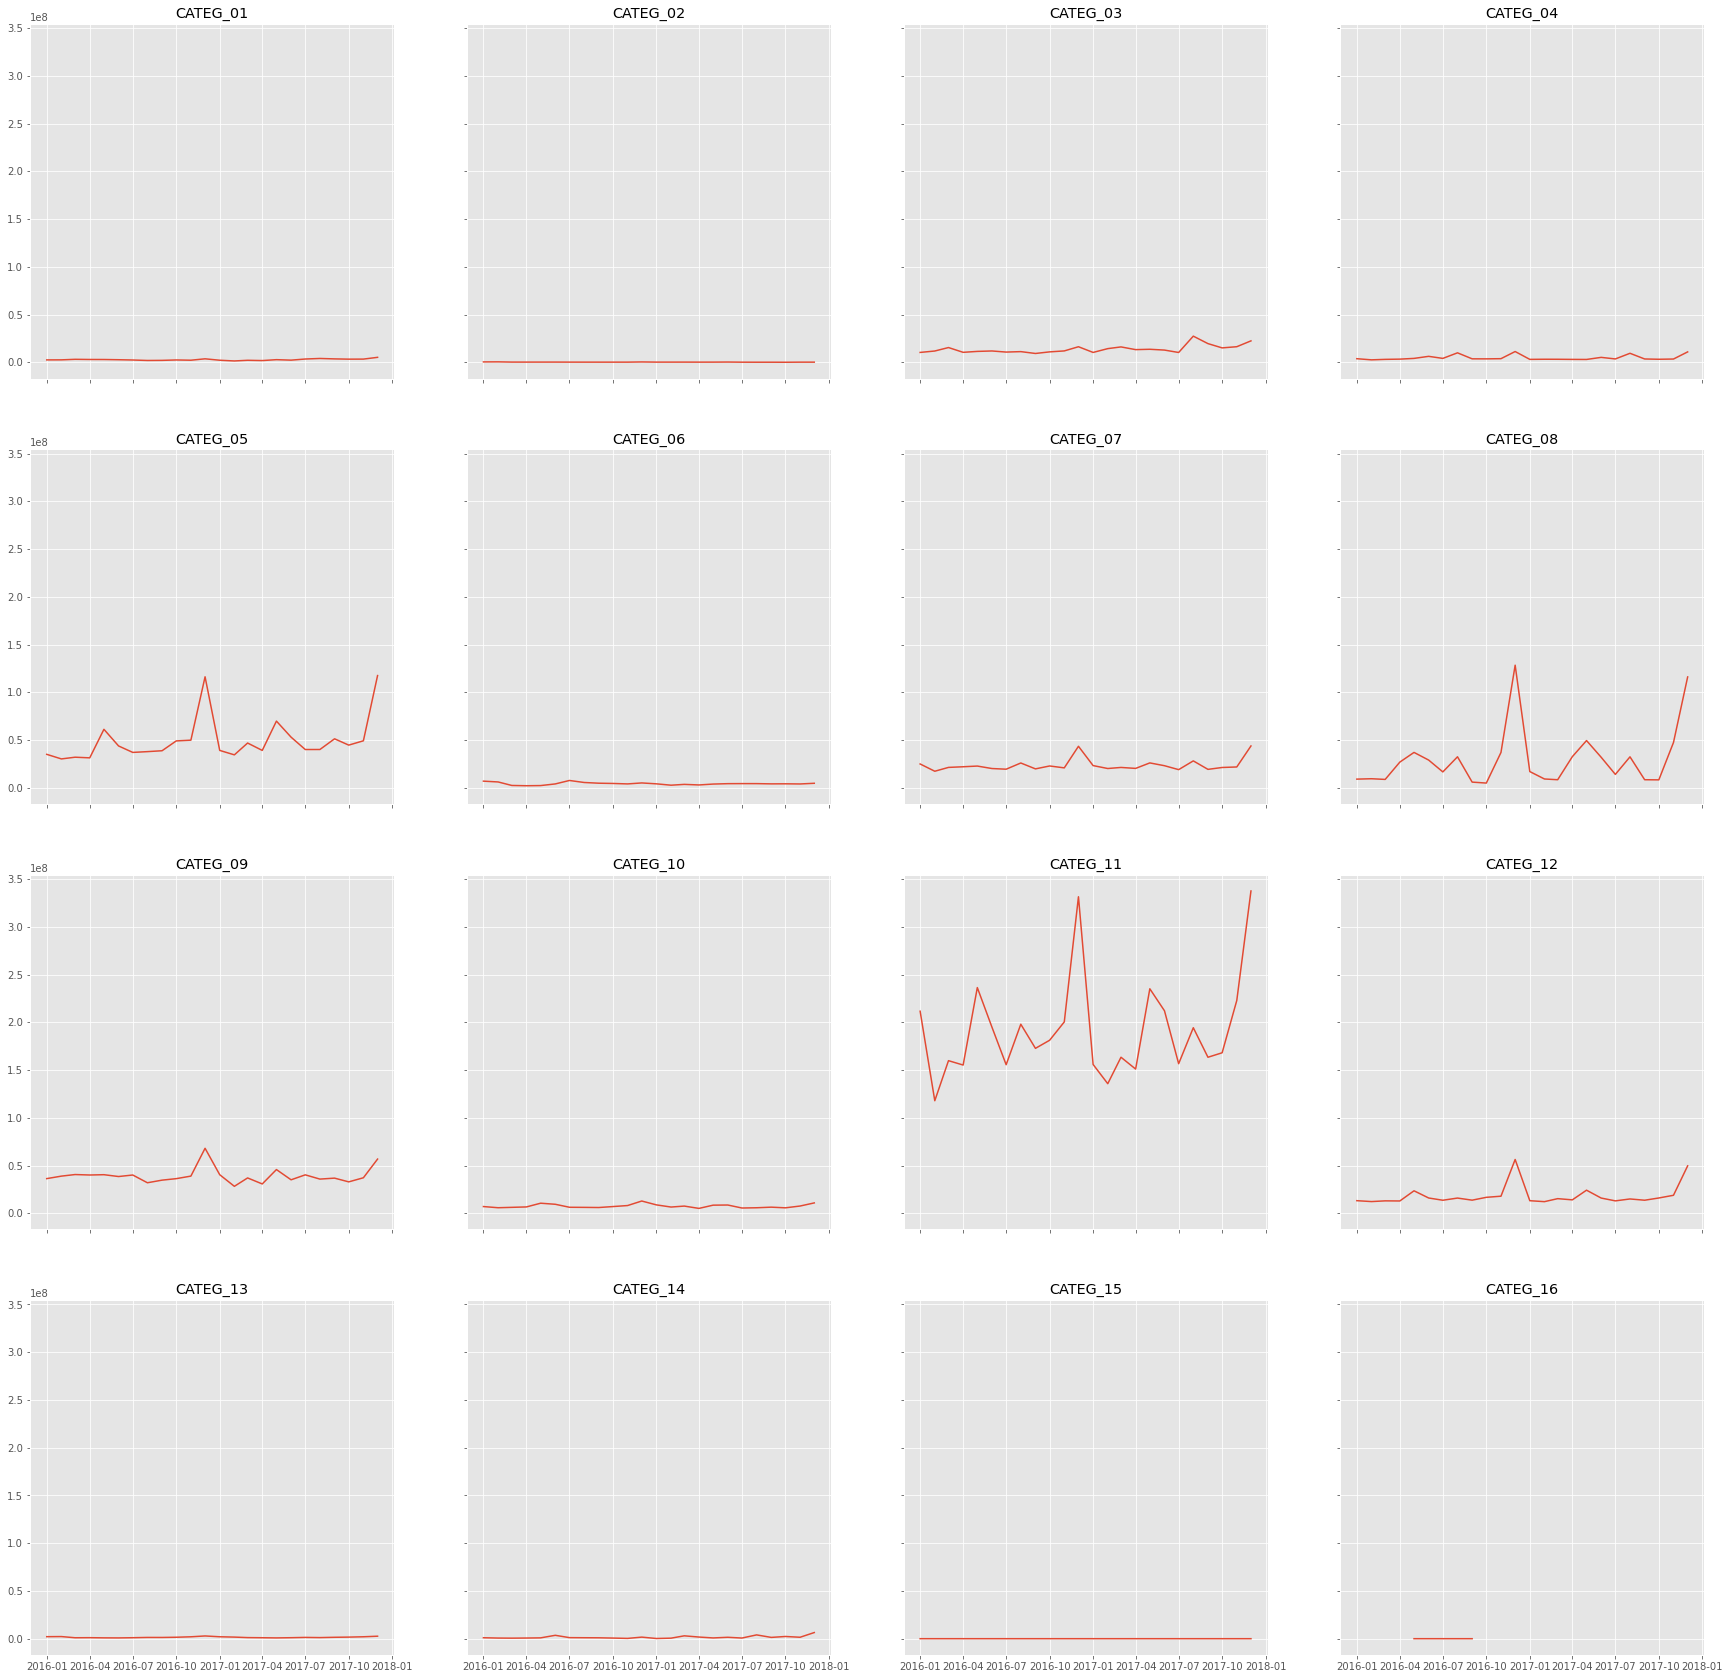

In [141]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(30,30))
m, n = -1, 0
for i, df in gb:
    if n % 4 == 0:
        m += 1
        n = 0
    ax[m, n].plot(df.datetime, df.receita, label=i, linestyle=line)
    ax[m, n].set_title(i, fontdict={'color':'black'})
    n += 1
plt.show();

___

## Cenário de expansão

In [5]:
cen_exp.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,10,2933307005008,2933307,FEATURE_01_VALUE_08,FEATURE_02_VALUE_02,False,50.00,FEATURE_05_VALUE_03,6,0.134654,0.131481,116.194058,2.913498,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,100.0,93.4,100.0,100.0,71.7,88.8
1,13,2916401003002,2916401,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,False,41.00,FEATURE_05_VALUE_03,4,0.116662,0.114995,26.345742,1.312612,NaN,NaN,84.3,77.5,100.0,100.0,63.5,78.8
2,16,2928703003003,2928703,NaN,FEATURE_02_VALUE_04,False,42.12,FEATURE_05_VALUE_05,2,0.104162,0.087807,35.362788,1.969512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,2906006003001,2906006,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,6,0.132954,0.131330,9.862757,1.383681,NaN,NaN,85.0,76.9,100.0,100.0,100.0,92.9
4,28,3550308005058,3550308,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,True,44.31,FEATURE_05_VALUE_03,8,0.190102,0.179140,5593.905463,2.815883,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cen_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       553 non-null    int64  
 1   cod_ap         553 non-null    int64  
 2   cod_municipio  553 non-null    int64  
 3   feature_01     189 non-null    object 
 4   feature_02     553 non-null    object 
 5   feature_03     553 non-null    bool   
 6   feature_04     553 non-null    float64
 7   feature_05     553 non-null    object 
 8   feature_06     553 non-null    int64  
 9   feature_07     553 non-null    float64
 10  feature_08     553 non-null    float64
 11  feature_09     553 non-null    float64
 12  feature_10     553 non-null    float64
 13  feature_11     41 non-null     object 
 14  feature_12     41 non-null     object 
 15  feature_13     159 non-null    float64
 16  feature_14     159 non-null    float64
 17  feature_15     159 non-null    float64
 18  feature_16

In [10]:
cen_exp.shape

(553, 21)

In [11]:
cen_exp.cod_loja.nunique()

553

___

## Lojas atuais

In [6]:
ljs_atual.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,0.167659,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,0.197287,1562.674817,3.670883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,0.179140,5593.905463,2.815883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,0.143677,12.824022,7.218132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,0.103083,325.531120,1.972944,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,100.0,88.1,100.0,100.0,88.5,93.8


In [9]:
ljs_atual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       3130 non-null   int64  
 1   cod_ap         3130 non-null   int64  
 2   cod_municipio  3130 non-null   int64  
 3   feature_01     1171 non-null   object 
 4   feature_02     3130 non-null   object 
 5   feature_03     3130 non-null   bool   
 6   feature_04     3130 non-null   float64
 7   feature_05     3130 non-null   object 
 8   feature_06     3130 non-null   int64  
 9   feature_07     3130 non-null   float64
 10  feature_08     3130 non-null   float64
 11  feature_09     3130 non-null   float64
 12  feature_10     3130 non-null   float64
 13  feature_11     245 non-null    object 
 14  feature_12     245 non-null    object 
 15  feature_13     874 non-null    float64
 16  feature_14     874 non-null    float64
 17  feature_15     874 non-null    float64
 18  feature_

In [13]:
ljs_atual.shape

(3130, 21)

In [12]:
ljs_atual.cod_loja.nunique()

3130

___